In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df = pd.read_csv('fuel efficiency prediction.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449.0,10.5,70,USA,ford torino


In [9]:
df.shape

(398, 9)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  393 non-null    float64
 3   horsepower    395 non-null    object 
 4   weight        393 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 28.1+ KB


In [11]:
df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,393.000000,393.000000,397.000000,398.000000
mean,23.514573,5.454774,193.940204,2972.966921,15.569773,76.010050
std,7.815984,1.701004,104.347265,848.568435,2.760964,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,2223.000000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,2807.000000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [12]:
df['horsepower'].unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', nan, '208',
       '155', '112', '92', '145', '137', '158', '167', '94', '107', '230',
       '49', '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)


(398, 9)
(392, 9)


In [17]:
df['horsepower'] = df['horsepower'].astype(float)
df.isnull().sum()


mpg             0
cylinders       0
displacement    5
horsepower      3
weight          5
acceleration    1
model year      0
origin          0
car name        0
dtype: int64

In [16]:
df.nunique()


mpg             127
cylinders         5
displacement     81
horsepower       93
weight          342
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

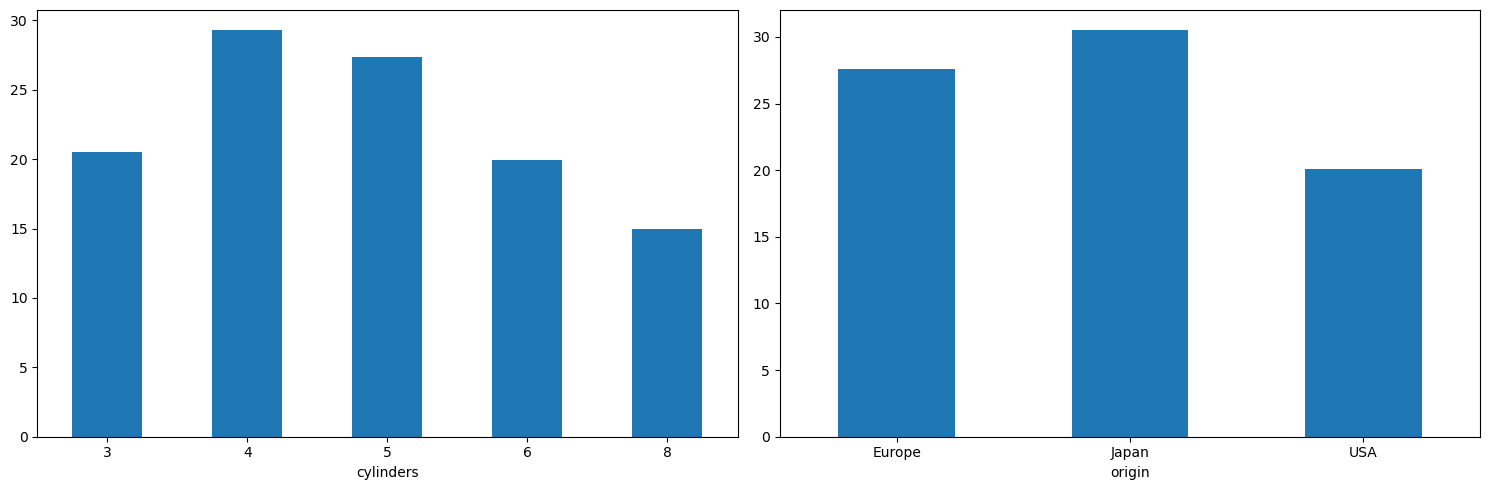

In [18]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['cylinders', 'origin']):
	plt.subplot(1, 2, i+1)
	x = df.groupby(col).mean()['mpg']
	x.plot.bar()
	plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


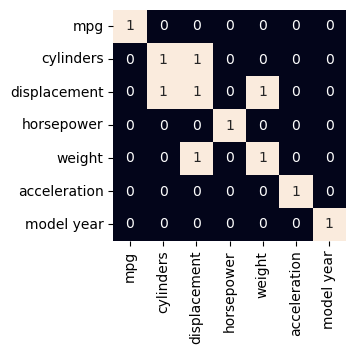

In [25]:
plt.figure(figsize=(3, 3))
sb.heatmap(df.corr() > 0.9,
		annot=True,
		cbar=False)
plt.show()


In [26]:
df.drop('displacement',
		axis=1,
		inplace=True)


In [27]:
from sklearn.model_selection import train_test_split
features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values

X_train, X_val, \
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=22)
X_train.shape, X_val.shape


((313, 6), (79, 6))

In [34]:
AUTO = df.data.experimental.AUTOTUNE

train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.batch(32)
	.prefetch(AUTO)
)

val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.batch(32)
	.prefetch(AUTO)
)


AttributeError: 'DataFrame' object has no attribute 'data'

In [29]:
model = keras.Sequential([
	layers.Dense(256, activation='relu', input_shape=[6]),
	layers.BatchNormalization(),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(1, activation='relu')
])


NameError: name 'keras' is not defined

In [30]:
model.compile(
	loss='mae',
	optimizer='adam',
	metrics=['mape']
)


NameError: name 'model' is not defined

In [31]:
model.summary()


NameError: name 'model' is not defined

In [32]:
history = model.fit(train_ds,
					epochs=50,
					validation_data=val_ds)


NameError: name 'model' is not defined

In [33]:
history_df = pd.DataFrame(history.history)
history_df.head()


NameError: name 'history' is not defined